## IPL 2022 Capstone Project

This project focuses on analyzing match-level data from the Indian Premier League (IPL) 2022 season. The goal is to derive meaningful insights into match outcomes, player performances, and team dynamics.

### Important Columns in the Dataset

- **date** : string  
- **venue** : string  
- **stage** : string  
- **team1** : string  
- **team2** : string  
- **toss_winner** : string  
- **toss_decision** : string  
- **first_innings_score** : integer  
- **second_innings_score** : integer  
- **won_by** : string  
- **margin** : integer  
- **top_scorer** : string  
- **highest_score** : integer  
- **player_of_the_match** : string  
- **best_bowling_figure** : string  
- **best_bowler** : string


### Loading the Libraries and Dataset

In [35]:
import numpy as np 
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings


warnings.filterwarnings("ignore")

In [36]:
import sys
from pathlib import Path

# Dynamically add the project root to the Python path
project_root = Path.cwd().parent  # Adjust based on the notebook's location
sys.path.append(str(project_root))

# Import the src package
from src.utilty import annotate_plot as ap

In [37]:
df = pd.read_csv("../Data/IPL.csv")
df.head()

,match_id,date,venue,team1,team2,stage,toss_winner,toss_decision,first_ings_score,first_ings_wkts,second_ings_score,second_ings_wkts,match_winner,won_by,margin,player_of_the_match,top_scorer,highscore,best_bowling,best_bowling_figure
0,1,"March 26,2022","Wankhede Stadium, Mumbai",Chennai,Kolkata,Group,Kolkata,Field,131,5,133,4,Kolkata,Wickets,6,Umesh Yadav,MS Dhoni,50,Dwayne Bravo,3--20
1,2,"March 27,2022","Brabourne Stadium, Mumbai",Delhi,Mumbai,Group,Delhi,Field,177,5,179,6,Delhi,Wickets,4,Kuldeep Yadav,Ishan Kishan,81,Kuldeep Yadav,3--18
2,3,"March 27,2022","Dr DY Patil Sports Academy, Mumbai",Banglore,Punjab,Group,Punjab,Field,205,2,208,5,Punjab,Wickets,5,Odean Smith,Faf du Plessis,88,Mohammed Siraj,2--59
3,4,"March 28,2022","Wankhede Stadium, Mumbai",Gujarat,Lucknow,Group,Gujarat,Field,158,6,161,5,Gujarat,Wickets,5,Mohammed Shami,Deepak Hooda,55,Mohammed Shami,3--25
4,5,"March 29,2022","Maharashtra Cricket Association Stadium,Pune",Hyderabad,Rajasthan,Group,Hyderabad,Field,210,6,149,7,Rajasthan,Runs,61,Sanju Samson,Aiden Markram,57,Yuzvendra Chahal,3--22


### Basic Information

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   match_id             74 non-null     int64 
 1   date                 74 non-null     object
 2   venue                74 non-null     object
 3   team1                74 non-null     object
 4   team2                74 non-null     object
 5   stage                74 non-null     object
 6   toss_winner          74 non-null     object
 7   toss_decision        74 non-null     object
 8   first_ings_score     74 non-null     int64 
 9   first_ings_wkts      74 non-null     int64 
 10  second_ings_score    74 non-null     int64 
 11  second_ings_wkts     74 non-null     int64 
 12  match_winner         74 non-null     object
 13  won_by               74 non-null     object
 14  margin               74 non-null     int64 
 15  player_of_the_match  74 non-null     object
 16  top_scorer

Check the size and rows of column of the dataset

In [39]:
print(f"Your rows are {df.shape[0]} \nYour Columns are {df.shape[1]}")

Your rows are 74 
Your Columns are 20


In [40]:
df.describe()

,match_id,first_ings_score,first_ings_wkts,second_ings_score,second_ings_wkts,margin,highscore
count,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000
mean,37.500000,171.121622,6.135135,158.540541,6.175676,16.972973,71.716216
std,21.505813,29.048355,2.222699,29.299207,2.639832,19.651047,20.705052
min,1.000000,68.000000,0.000000,72.000000,1.000000,2.000000,28.000000
25%,19.250000,154.250000,5.000000,142.750000,4.000000,5.250000,57.000000
50%,37.500000,169.500000,6.000000,160.000000,6.000000,8.000000,68.000000
75%,55.750000,192.750000,8.000000,176.000000,8.000000,18.000000,87.750000
max,74.000000,222.000000,10.000000,211.000000,10.000000,91.000000,140.000000


Now let's see how columns have null value in total. 

In [41]:
df.isnull().sum()

match_id               0
date                   0
venue                  0
team1                  0
team2                  0
stage                  0
toss_winner            0
toss_decision          0
first_ings_score       0
first_ings_wkts        0
second_ings_score      0
second_ings_wkts       0
match_winner           0
won_by                 0
margin                 0
player_of_the_match    0
top_scorer             0
highscore              0
best_bowling           0
best_bowling_figure    0
dtype: int64

__Now , Here comes the Basic Questions__

1. Which team won the most matches ?

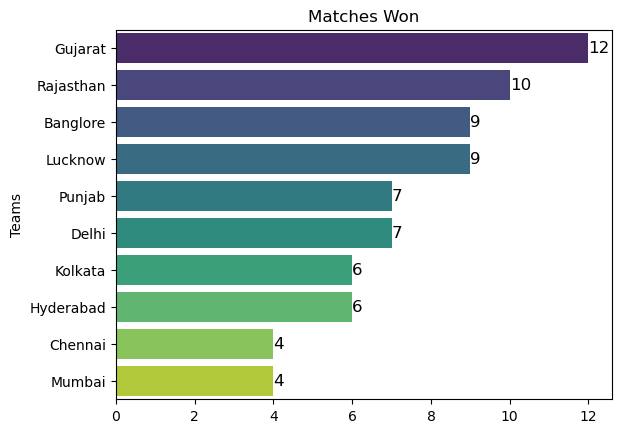

In [43]:
match_wins=df['match_winner'].value_counts()
ax = sns.barplot(y=match_wins.index,x=match_wins.values,palette= 'viridis')
plt.title('Matches Won')
plt.ylabel('Teams')


ap(ax , orient='h')




2. Toss Decision Trends

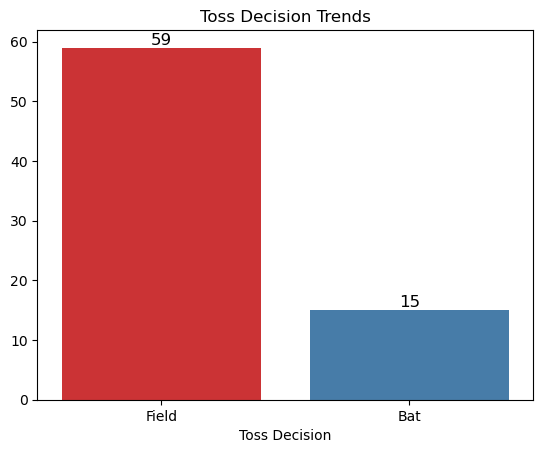

In [44]:
ax = sns.countplot(x = df['toss_decision'],palette='Set1')
plt.title('Toss Decision Trends')
plt.xlabel('Toss Decision')
plt.ylabel('')

ap(ax )

In [45]:
df['match_winner']

0       Kolkata
1         Delhi
2        Punjab
3       Gujarat
4     Rajasthan
        ...    
69       Punjab
70      Gujarat
71     Banglore
72    Rajasthan
73      Gujarat
Name: match_winner, Length: 74, dtype: object

3. Toss Winner vs Match Winner

(np.float64(-1.099999767456901),
 np.float64(1.0999999938280631),
 np.float64(-1.0999998335697443),
 np.float64(1.0999999920747496))

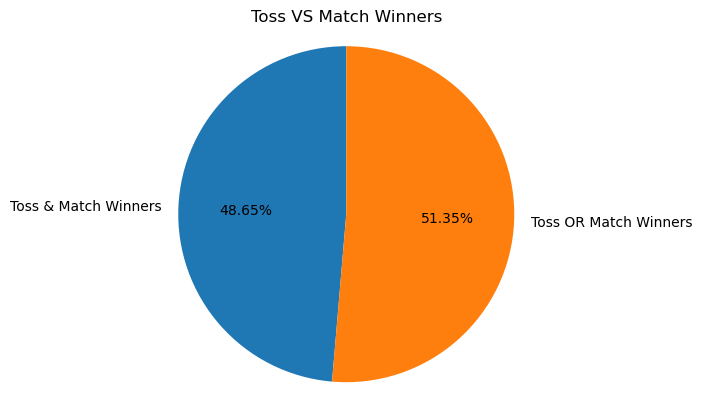

In [46]:
percentage = lambda x : (x *100)/df.shape[0]
toss_match_win = df[df['toss_winner'] == df['match_winner']]['match_id'].count()
toss_win = df[df['toss_winner'] != df['match_winner']]['match_id'].count()
percentage_data = {
    
    'Toss & Match Winners': percentage(toss_match_win).round(2),
    'Toss OR Match Winners ': percentage(toss_win).round(2)
}

df1 = pd.DataFrame(list(percentage_data.items()), columns=['Category', 'Count'])


# ax = sns.barplot(x='Category',y='Count',data=df1,palette='colorblind')
# plt.title('Toss VS Match Winners')
# plt.ylabel('Percentage (%)')
# plt.xlabel('')

# annotate_plot(ax)

colors = sns.color_palette('tab10',n_colors=len(df1))

plt.pie(
    df1['Count'],
    labels=df1['Category'],
    autopct= "%.2f%%",
    startangle=90,
    colors= colors
)
plt.title("Toss VS Match Winners")
plt.axis('equal')


4. How do teams win?(Runs vs Wickets)

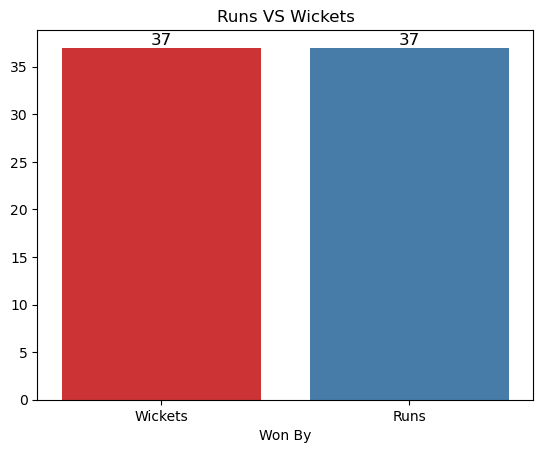

In [47]:
ax =sns.countplot(x = df['won_by'],palette= 'Set1')
plt.title('Runs VS Wickets')
plt.xlabel("Won By")
plt.ylabel('')

ap(ax)


#### Key Player Performances

1. Most "Player of the Match" Awards

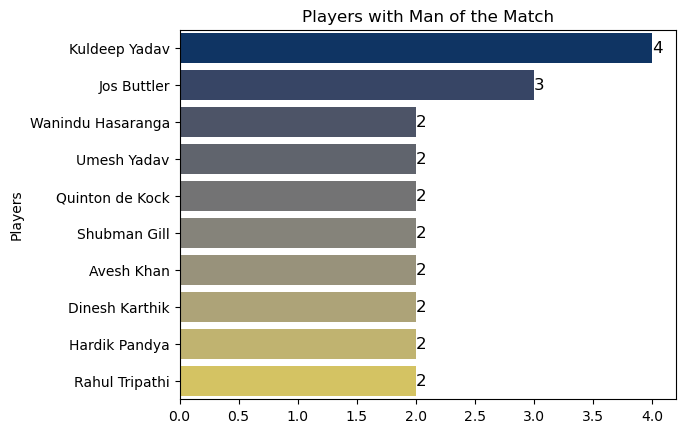

In [48]:
count = df['player_of_the_match'].value_counts().head(10)
ax=sns.barplot(x = count.values , y = count.index,palette='cividis')
plt.title("Players with Man of the Match")
plt.ylabel('Players')

ap(ax,orient='h')

2. Top Scorers

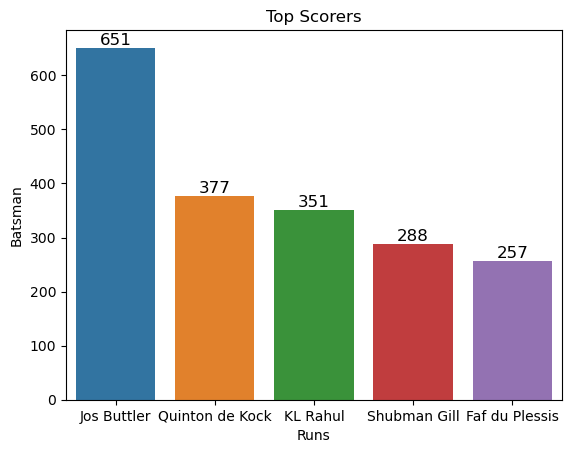

In [49]:
high = df.groupby('top_scorer')['highscore'].sum().sort_values(ascending= False).head(5)
ax =sns.barplot(y=high.values,x=high.index,palette='tab10')
plt.title('Top Scorers')
plt.ylabel('Batsman')
plt.xlabel('Runs')
ap(ax)

3. 10 Best Bowling Figures

In [50]:
df['highest_wickets'] = df['best_bowling_figure'].apply(lambda x : x.split('--')[0])
df['highest_wickets'] = df['highest_wickets'].astype(int)

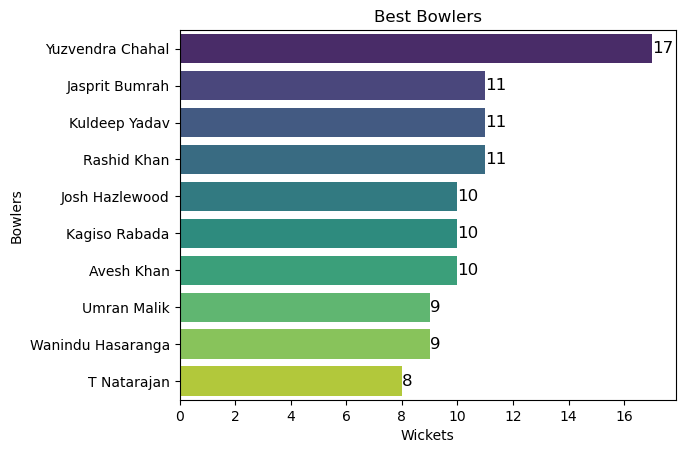

In [51]:
top_bowlers = df.groupby('best_bowling')['highest_wickets'].sum().sort_values(ascending=False).head(10)
ax = sns.barplot(y=top_bowlers.index,x=top_bowlers.values,palette='viridis')
plt.title('Best Bowlers')
plt.ylabel('Bowlers')
plt.xlabel('Wickets')
ap(ax, orient = 'h' )

#### Venue Analysis

Most Matches Played by Venue

In [52]:
venue_count = df['venue'].value_counts().head(4)
venue_count

venue
Wankhede Stadium, Mumbai                        21
Dr DY Patil Sports Academy, Mumbai              20
Brabourne Stadium, Mumbai                       16
Maharashtra Cricket Association Stadium,Pune    13
Name: count, dtype: int64

(np.float64(-1.0999981973165522),
 np.float64(1.0999829085319357),
 np.float64(-1.0999997019184697),
 np.float64(1.0999999858056415))

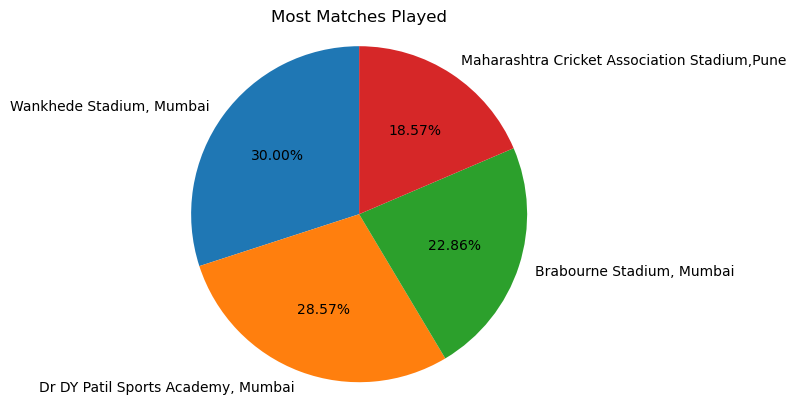

In [53]:
colors = sns.color_palette('tab10',n_colors=len(venue_count))

plt.pie(
    venue_count.values,
    labels=venue_count.index,
    autopct= "%.2f%%",
    startangle=90,
    colors= colors
)

plt.title("Most Matches Played")
plt.axis('equal')

#### Questions and Insights

Q1: which team won by the highest margin of runs?

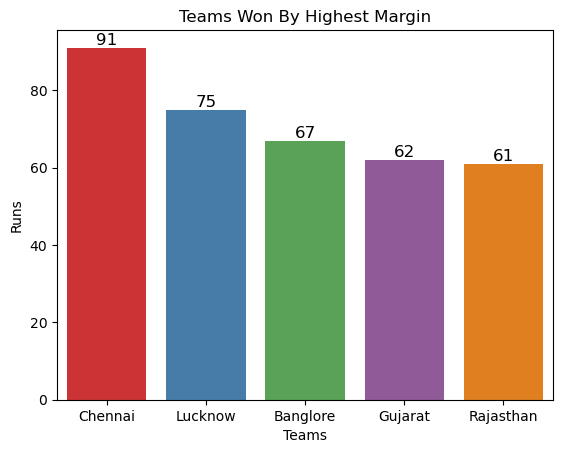

In [54]:
high = df[df['won_by']=='Runs'].sort_values(by = 'margin',ascending=False).head(5)[['match_winner','margin']]

ax=sns.barplot(x=high['match_winner'], y = high['margin'],palette= 'Set1')
plt.title("Teams Won By Highest Margin")
plt.ylabel('Runs')
plt.xlabel('Teams')

ap(ax)

Q2: Which player has the highest individual score?

In [55]:
df[df['highscore'] == df['highscore'].max()][['top_scorer','highscore']]

,top_scorer,highscore
65,Quinton de Kock,140


Q3.Which Bowler has the best bowling figure?

In [56]:

df[df['highest_wickets']==df['highest_wickets'].max()][['best_bowling','best_bowling_figure']]

,best_bowling,best_bowling_figure
29,Yuzvendra Chahal,5--40
39,Umran Malik,5--25
53,Wanindu Hasaranga,5--18
55,Jasprit Bumrah,5--10
